In [ ]:
import pandas as pd

In [ ]:
# Create a sample dataframe
data = {
    'A': [1, 2, 3, 10, 20, 30, 100],
    'B': [4, 5, 6, 50, 60, 70, 200],
    'C': [7, 8, 9, 90, 100, 110, 300]
}

dataframe = pd.DataFrame(data)
print(dataframe)

     A    B    C
0    1    4    7
1    2    5    8
2    3    6    9
3   10   50   90
4   20   60  100
5   30   70  110
6  100  200  300


In [ ]:
df = pd.read_csv('business.retailsales.csv')

In [ ]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())
print(df.groupby('Product Type').size())

(1775, 6)
Index(['Product Type', 'Net Quantity', 'Gross Sales', 'Discounts', 'Returns',
       'Total Net Sales'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB
None
       Net Quantity   Gross Sales    Discounts      Returns  Total Net Sales
count   1775.000000   1775.000000  1775.000000  1775.000000      1775.000000
mean       3.712676    199.671746    -6.317623    -5.385437       187.968687
std        6.243078    464.880638    20.903517    46.654269       414.547039
min       -1.

In [ ]:
print(df.head(5))

      Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
0  Art & Sculpture            34      14935.0    -594.00  -1609.0   
1           Basket            13       3744.0    -316.80      0.0   
2           Basket            12       3825.0    -201.60   -288.0   
3           Basket            17       3035.0     -63.25      0.0   
4  Art & Sculpture            47       2696.8     -44.16      0.0   

   Total Net Sales  
0         12732.00  
1          3427.20  
2          3335.40  
3          2971.75  
4          2652.64  


In [ ]:
#finding null values
a = df.isnull().sum()
print('Show null values coulmns:')
print(a)
print('')

# Dropping null value columns which cross the threshold
b =  a[a>(0.05*len(a))]
print (b)
df = df.drop(b.index, axis=1)
print (df.shape)

Show null values coulmns:
Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

Product Type    8
dtype: int64
(1775, 5)


In [ ]:
df.columns

Index(['Net Quantity', 'Gross Sales', 'Discounts', 'Returns',
       'Total Net Sales'],
      dtype='object')

In [ ]:
# Replacing null value columns (int, float) with most used value
a2 = df.select_dtypes(include=['integer','float']).isnull().sum()
print('Find missing int/float value columns')
print (a2)
print('')

b2 = a2[a2!=0].index 
print (b2)
# Check if the column has missing values
if b2.isnull():
    # Get the mode value for the column 'B'
    mode_value = df[b2].mode()

    # Check if the mode value exists
    if len(mode_value) > 0:
        # Fill missing values with the mode value
        print('Replacing null value columns')
        df = df.fillna(mode_value[0])

# Print the updated DataFrame
print(df)

Find missing int/float value columns
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

Index([], dtype='object')
      Net Quantity  Gross Sales  Discounts  Returns  Total Net Sales
0               34      14935.0    -594.00 -1609.00         12732.00
1               13       3744.0    -316.80     0.00          3427.20
2               12       3825.0    -201.60  -288.00          3335.40
3               17       3035.0     -63.25     0.00          2971.75
4               47       2696.8     -44.16     0.00          2652.64
...            ...          ...        ...      ...              ...
1770             0         28.0      -2.81   -25.19             0.00
1771             0         28.0       0.00   -28.00             0.00
1772             0        116.0     -23.20   -92.80             0.00
1773             0         16.5       0.00   -16.50             0.00
1774            -1          0.0       0.00  -106.25        

<ipython-input-8-f0dedf764e35>:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if b2.isnull():


In [ ]:
# Creating new columns from existing columns
print (df.shape)
a3 = df['Net Quantity'] * df['Gross Sales']
df['Quantity Gross Sales'] = a3
print (df.shape)
print(df.columns)

(1775, 5)
(1775, 6)
Index(['Net Quantity', 'Gross Sales', 'Discounts', 'Returns',
       'Total Net Sales', 'Quantity Gross Sales'],
      dtype='object')


In [ ]:
# Dropping unwanted columns
df = df.drop(["Quantity Gross Sales"], axis=1) 
print (df.shape)

(1775, 5)


**Outliers Removal using scipy**



In [ ]:
import pylab
import numpy as np
import matplotlib._pylab_helpers
from scipy import stats

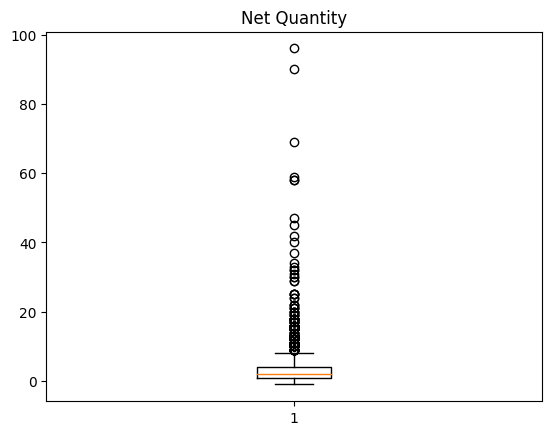

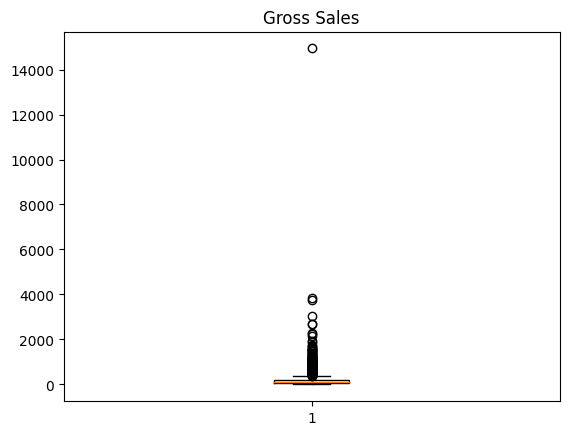

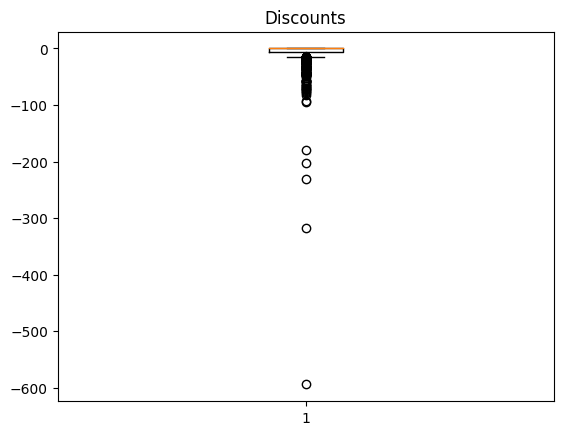

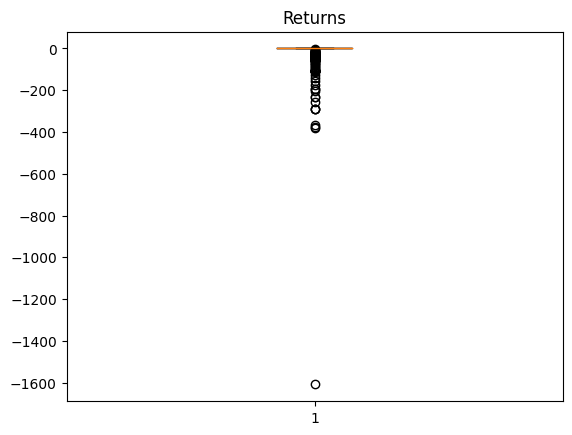

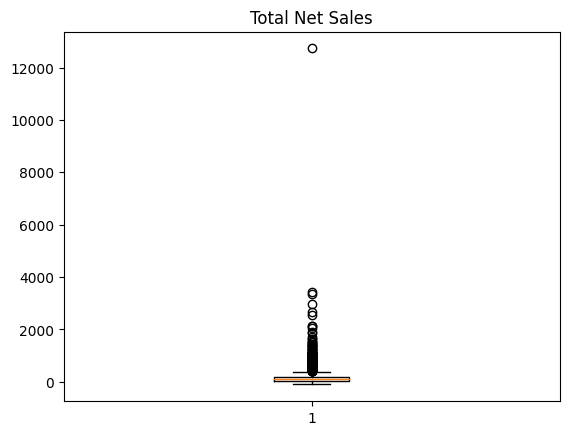

In [ ]:
# Finding outlier in data
for i in range(len(df.columns)):
    pylab.figure()
    pylab.boxplot(df[df.columns[i]])
    #pylab.violinplot(df[df.columns[i]])
    pylab.title(df[df.columns[i]].name)

In [ ]:
# Removing outliers
z = np.abs(stats.zscore(df))
print(z)
print(np.where(z > 3)) # 3 is threshold (Set a threshold for outlier detection)
value = z.iloc[0, 3] # Retrieve a value from outlier by specifying the row position(0) and column position (3)
print("value:", value)
df1 = df[(z < 3).all(axis=1)]
print ("Before removing outliers, Data Frame shpae:", df.shape)
print ("After removing outliers, Data Frame shpae:", df1.shape)

      Net Quantity  Gross Sales  Discounts    Returns  Total Net Sales
0         4.852712    31.705947  28.121967  34.381987        30.268136
1         1.488039     7.626317  14.857303   0.115465         7.816107
2         1.327816     7.800604   9.344715   6.059343         7.594598
3         2.128929     6.100764   2.724346   0.115465         6.717129
4         6.935605     5.373061   1.810846   0.115465         5.947132
...            ...          ...        ...        ...              ...
1770      0.594854     0.369385   0.167848   0.424616         0.453559
1771      0.594854     0.369385   0.302313   0.484863         0.453559
1772      0.594854     0.180036   0.807861   1.874195         0.453559
1773      0.594854     0.394130   0.302313   0.238300         0.453559
1774      0.755077     0.429633   0.302313   2.162567         0.709935

[1775 rows x 5 columns]
(array([   0,    0,    0,    0,    0,    1,    1,    1,    2,    2,    2,
          2,    3,    3,    4,    4,    4,    5, 

**Simple python code for Outliers Removal**

In [ ]:
import pandas as pd

# Calculate z-scores for each column
z_scores = (df - df.mean()) / df.std()

# Set the threshold for outliers (e.g., z-score > 3)
threshold = 3

# Filter out rows with any column exceeding the threshold
cleaned_df = df[(z_scores < threshold).all(axis=1)]

print(cleaned_df)
print ("Before removing outliers, Data Frame shpae:", df.shape)
print ("After removing outliers, Data Frame shpae:", cleaned_df.shape)


      Net Quantity  Gross Sales  Discounts  Returns  Total Net Sales
19               5       1467.0     -57.60     0.00          1409.40
20               9       1466.0     -75.89     0.00          1390.11
21              11       1375.0     -12.50     0.00          1362.50
26              15       1260.0       0.00     0.00          1260.00
27               9       1315.0     -57.50     0.00          1257.50
...            ...          ...        ...      ...              ...
1770             0         28.0      -2.81   -25.19             0.00
1771             0         28.0       0.00   -28.00             0.00
1772             0        116.0     -23.20   -92.80             0.00
1773             0         16.5       0.00   -16.50             0.00
1774            -1          0.0       0.00  -106.25          -106.25

[1736 rows x 5 columns]
Before removing outliers, Data Frame shpae: (1775, 5)
After removing outliers, Data Frame shpae: (1736, 5)


**Feature Selection**

In [ ]:
# 1.Correlation-based Feature Selection
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('business.retailsales.csv')

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

# Select features with a correlation threshold
threshold = 0.5
selected_features = []
for col in corr_matrix:
    if abs(corr_matrix[col].mean()) > threshold:
        selected_features.append(col)

print("\nselected_features: ", selected_features)
# Create a new DataFrame with selected features
df_selected = df[selected_features]

                 Net Quantity  Gross Sales  Discounts   Returns  \
Net Quantity         1.000000     0.467464  -0.318734 -0.132924   
Gross Sales          0.467464     1.000000  -0.852152 -0.725444   
Discounts           -0.318734    -0.852152   1.000000  0.590271   
Returns             -0.132924    -0.725444   0.590271  1.000000   
Total Net Sales      0.493191     0.996805  -0.838764 -0.671219   

                 Total Net Sales  
Net Quantity            0.493191  
Gross Sales             0.996805  
Discounts              -0.838764  
Returns                -0.671219  
Total Net Sales         1.000000  

selected_features:  []


In [ ]:
# 2.SelectKBest (Univariate Feature Selection)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Load the dataset into a DataFrame
df = pd.read_csv('business.retailsales.csv')

In [ ]:
df.dtypes

Product Type        object
Net Quantity         int64
Gross Sales        float64
Discounts          float64
Returns            float64
Total Net Sales    float64
dtype: object

In [ ]:
enc = LabelEncoder()

In [ ]:
df['Product Type'] = enc.fit_transform(df['Product Type'])

In [ ]:
# Separate the features (X) and the target variable (y)
X = df.drop('Gross Sales', axis=1)
y = df['Gross Sales']

In [ ]:
# Apply SelectKBest with ANOVA F-value scoring
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

In [ ]:
X_selected

array([[ 1.0000e+00,  3.4000e+01, -5.9400e+02, -1.6090e+03,  1.2732e+04],
       [ 2.0000e+00,  1.3000e+01, -3.1680e+02,  0.0000e+00,  3.4272e+03],
       [ 2.0000e+00,  1.2000e+01, -2.0160e+02, -2.8800e+02,  3.3354e+03],
       ...,
       [ 2.0000e+00,  0.0000e+00, -2.3200e+01, -9.2800e+01,  0.0000e+00],
       [ 1.1000e+01,  0.0000e+00,  0.0000e+00, -1.6500e+01,  0.0000e+00],
       [ 1.1000e+01, -1.0000e+00,  0.0000e+00, -1.0625e+02, -1.0625e+02]])

In [ ]:
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Create a new DataFrame with selected features
df_selected = df.iloc[:, selected_indices]

df_selected

,Product Type,Net Quantity,Gross Sales,Discounts,Returns
0,1,34,14935.0,-594.00,-1609.00
1,2,13,3744.0,-316.80,0.00
2,2,12,3825.0,-201.60,-288.00
3,2,17,3035.0,-63.25,0.00
4,1,47,2696.8,-44.16,0.00
...,...,...,...,...,...
1770,11,0,28.0,-2.81,-25.19
1771,9,0,28.0,0.00,-28.00
1772,2,0,116.0,-23.20,-92.80
1773,11,0,16.5,0.00,-16.50


**Feature selection for another data set**

<ipython-input-24-68d476ebbab9>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correlations.where(numpy.triu(numpy.ones(correlations.shape), k=1).astype(numpy.bool))


(20, 18) Index(['F', 'G', 'H', 'J', 'K', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z'],
      dtype='object')


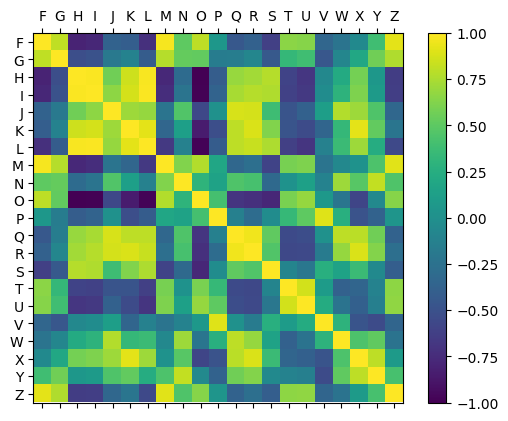

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.feature_selection import RFE
from sklearn.datasets import make_friedman1

df = pd.read_csv('./correlation_input_data.csv')

# Dropping all process parameters
df = df.drop(["A","B", "C", "D", "E"], axis=1) 

#finding correlation between manipulated & disturbance variables
correlations = df.corr()
correlations = correlations.round(2)
correlations.to_csv('11_MV_DV_correlation.csv',index=False)
fig = plt.figure()
g = fig.add_subplot(111)
cax = g.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,21,1)
g.set_xticks(ticks)
g.set_yticks(ticks)
g.set_xticklabels(list(df.columns))
g.set_yticklabels(list(df.columns))
plt.savefig('11_MV_DV_correlation.png')

#removing parameters with high correlation 
upper = correlations.where(numpy.triu(numpy.ones(correlations.shape), k=1).astype(numpy.bool))
cols_to_drop = []
for i in upper.columns:
	if (any(upper[i] == -1) or any(upper[i] == -0.98) or any(upper[i] == -0.99) or any(upper[i] == 0.98) or any(upper[i] == 0.99) or any(upper[i] == 1)):
		cols_to_drop.append(i)
df = df.drop(cols_to_drop, axis=1) 

print (df.shape,df.columns)
df.to_csv('./correlation_output_data.csv',index=False)